In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
labels = pd.read_csv("./data/samples.csv")

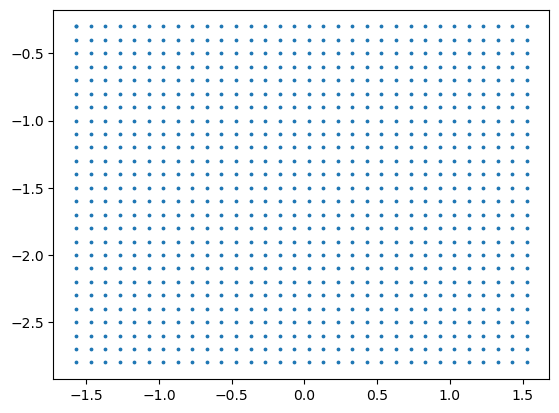

In [3]:
plt.scatter(labels.q_0, labels.q_3, s=3)

In [4]:
import scipy.io.wavfile
import os

inputpath = "./data" 
inputlength =  5
SR = 16000
outputlength = 4096//2
applyFFT = True

inputfiles = os.listdir(inputpath)
n_files = len(labels)
filelen = scipy.io.wavfile.read(inputpath + "/" + "2.wav")[1].shape[0]

recordings = np.full((n_files, filelen, 4), np.nan, dtype=np.int16)


for indx, row in labels.iterrows():
    sr, data = scipy.io.wavfile.read(f"{inputpath}/{row.idx}.wav")
    recordings[indx,:,:] = data[:,1:5]

/home/tilman/miniforge3/envs/acousticSensing/lib/python3.12/site-packages/numpy/_core/numeric.py:362: RuntimeWarning: invalid value encountered in cast
  multiarray.copyto(a, fill_value, casting='unsafe')


Text(0.5, 0, 'Starttime of Window [s]')

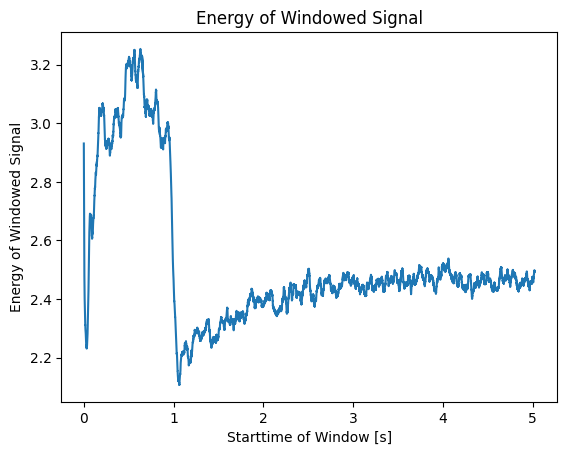

In [6]:
from numpy.lib.stride_tricks import sliding_window_view
normalized_recording = recordings[:,:,0]/np.max(np.abs(recordings[:,:,0]))
windowed_recording = sliding_window_view(normalized_recording**2, 500, axis=1)
energy_per_record = np.sum(windowed_recording, axis=2)

averaged_energy = np.average(energy_per_record, axis=0)
plt.plot(np.arange(len(averaged_energy))/16000, averaged_energy)
plt.title("Energy of Windowed Signal")
plt.ylabel("Energy of Windowed Signal")
plt.xlabel("Starttime of Window [s]")

In [7]:
len(np.unique(recordings[:,:,0]))

6117

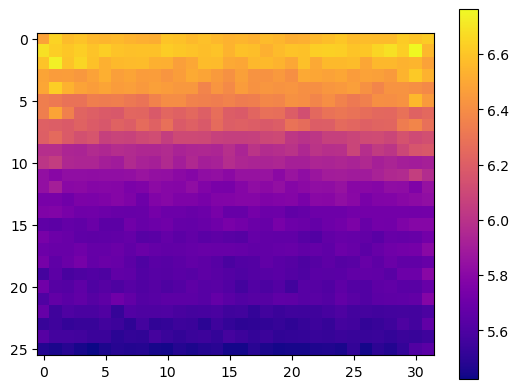

In [8]:

normalized_recording = recordings[:,:,0]/np.max(np.abs(recordings[:,:,0]))
energy = np.sum(normalized_recording**2, axis=1)
grid = np.full((26,32), np.nan)
x_poses = []
for idx, row in labels.iterrows():
    x_pos = int(np.round((row.q_0 + 1.5708)/0.1,0))
    if x_pos < 0:
        continue#
    x_poses.append(x_pos)
    y_pos = int(np.round((row.q_3 +0.3)/-0.1, 0))
    #if energy[idx] > 300:
    #>    continue
    grid[y_pos, x_pos] = energy[idx]

plt.imshow(np.log(grid), cmap="plasma")
plt.colorbar()

0 1323.863806750298
1 520.2265650002238
2 597.7296193533621
3 540.0628681696098
4 516.9690633240474
5 498.6094853989116
6 487.60563910582727
7 512.5149369668544
8 510.22088619173365
9 491.59497757180867
10 499.56630379143434
11 539.0537437929559
12 515.3622141644877
13 506.06319217218953
14 490.3128361713402
15 501.7793869995234
16 505.9486146380161
17 496.5465534394993
18 491.37939615566864
19 513.9130929982273
20 505.35172447472996
21 498.3971893069088
22 495.21645494822803
23 512.6935508486731
24 519.5123991342413
25 530.5325686336469
26 515.4365244834772
27 525.427615733354
28 511.14944815963315
29 510.91500039831305
30 522.6803982275393
31 529.7612623342648
32 522.5249988721357
33 531.7585378182795
34 667.1906410505319
35 544.0333353287268
36 548.0795466417162
37 545.4907346058461
38 510.8971881353999
39 536.5312433815496
40 553.3594439366885
41 556.0645400275152
42 543.7732906055745
43 528.4436773945939
44 497.04802292500295
45 531.6691662606202
46 511.8122529896675
47 519.360860

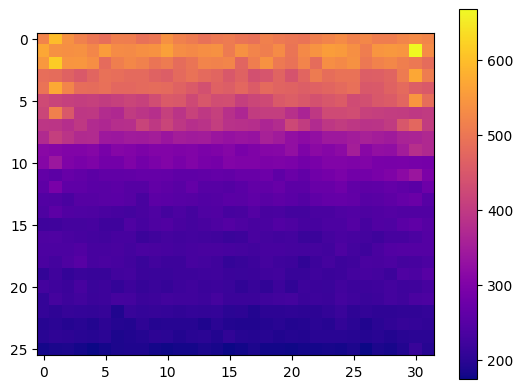

In [9]:
energy = np.sum(normalized_recording[:,16000:]**2, axis=1)
grid = np.full((26,32), np.nan)
x_poses = []
for idx, row in labels.iterrows():
    x_pos = int(np.round((row.q_0 + 1.5708)/0.1,0))
    if x_pos < 0:
        continue#
    x_poses.append(x_pos)
    y_pos = int(np.round((row.q_3 +0.3)/-0.1, 0))
    if energy[idx] > 200:
        print(idx, energy[idx])
    #>    continue
    grid[y_pos, x_pos] = energy[idx]

plt.imshow(grid, cmap="plasma")
plt.colorbar()

Text(0.5, 1.0, 'Energy of Recording for contact Mic on Joint 3')

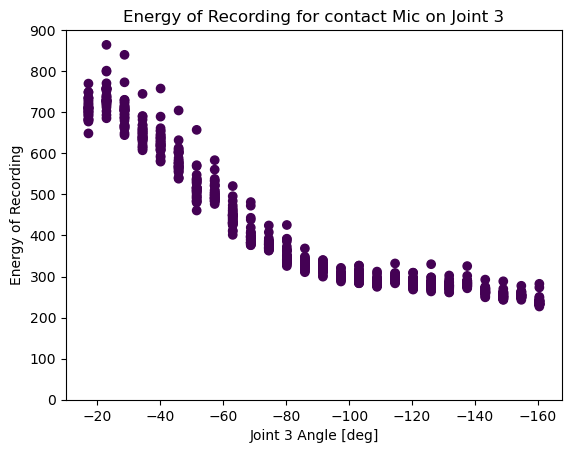

In [15]:
plt.scatter(np.rad2deg(labels.q_3), energy, c=labels.session_id)
plt.ylim(0,900)
plt.gca().xaxis.set_inverted(True)
plt.ylabel("Energy of Recording")
plt.xlabel("Joint 3 Angle [deg]")
plt.title("Energy of Recording for contact Mic on Joint 3")

Text(0.5, 0, 'Starttime of Window [s]')

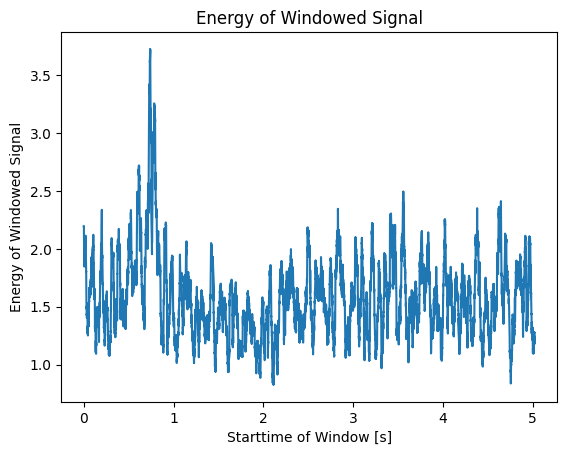

In [10]:
plt.plot(np.arange(len(averaged_energy))/16000, energy_per_record[773])
plt.title("Energy of Windowed Signal")
plt.ylabel("Energy of Windowed Signal")
plt.xlabel("Starttime of Window [s]")

In [11]:
labels.iloc[773]

idx              774
q_0          -1.1708
q_1              0.0
q_2              0.0
q_3             -2.7
q_4              0.0
q_5           1.5708
q_6              0.0
samples        80896
SR             16000
session_id         0
notes               
Name: 773, dtype: object

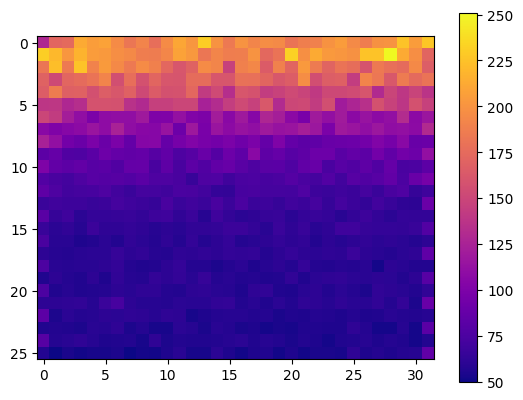

In [12]:
energy = np.sum(normalized_recording[:,:16000]**2, axis=1)
grid = np.full((26,32), np.nan)
x_poses = []
for idx, row in labels.iterrows():
    x_pos = int(np.round((row.q_0 + 1.5708)/0.1,0))
    if x_pos < 0:
        continue
    x_poses.append(x_pos)
    y_pos = int(np.round((row.q_3 +0.3)/-0.1, 0))
    if energy[idx] > 800:
        print(idx, energy[idx])
        continue
    grid[y_pos, x_pos] = energy[idx]

plt.imshow(grid, cmap="plasma")
plt.colorbar()

In [13]:
labels.iloc[671]

idx              672
q_0           1.4292
q_1              0.0
q_2              0.0
q_3             -2.3
q_4              0.0
q_5           1.5708
q_6              0.0
samples        80896
SR             16000
session_id         0
notes               
Name: 671, dtype: object

Text(0.5, 0, 'Starttime of Window [s]')

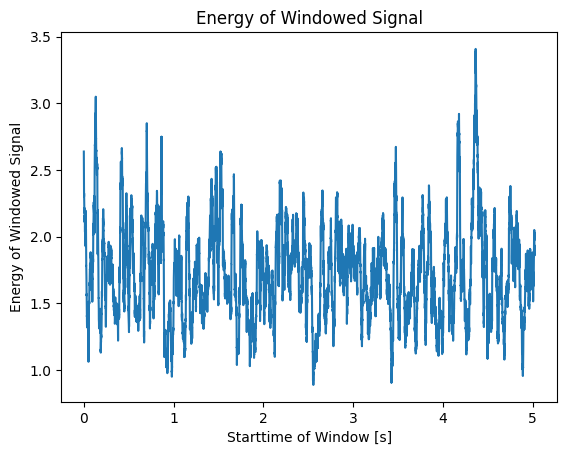

In [14]:
plt.plot(np.arange(len(averaged_energy))/16000, energy_per_record[671])
plt.title("Energy of Windowed Signal")
plt.ylabel("Energy of Windowed Signal")
plt.xlabel("Starttime of Window [s]")

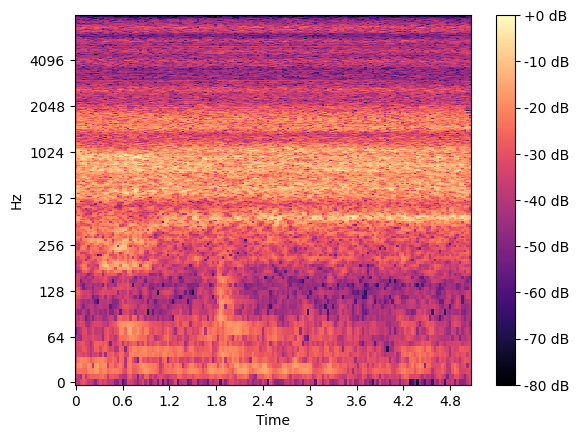

In [16]:
import librosa
sig = normalized_recording[773,:]

D = librosa.stft(sig)
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)
ref = np.max(np.abs(D))

fig, ax = plt.subplots()
img = librosa.display.specshow(S_db, sr=16000, x_axis='time', y_axis="log", ax=ax)
fig.colorbar(img, ax=ax, format="%+2.f dB")

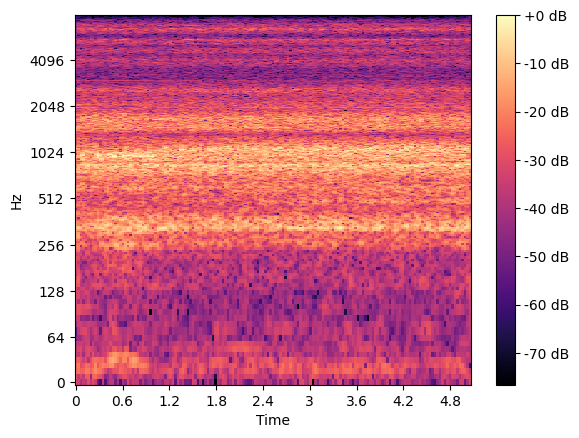

In [17]:
sig = normalized_recording[406,:]

D = librosa.stft(sig)  # STFT of y
S_db = librosa.amplitude_to_db(np.abs(D), ref=ref)

fig, ax = plt.subplots()
img = librosa.display.specshow(S_db, sr=16000, x_axis='time', y_axis="log", ax=ax, vmax=0)
fig.colorbar(img, ax=ax, format="%+2.f dB")

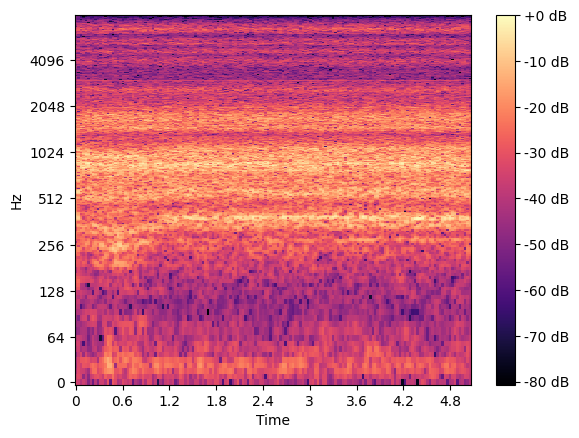

In [18]:
sig = normalized_recording[671,:]

D = librosa.stft(sig)  # STFT of y
S_db = librosa.amplitude_to_db(np.abs(D), ref=ref)

fig, ax = plt.subplots()
img = librosa.display.specshow(S_db, sr=16000, x_axis='time', y_axis="log", ax=ax, vmax=0)
fig.colorbar(img, ax=ax, format="%+2.f dB")

In [20]:
def map_data_to_grid(data):
    grid = np.full((26,32), np.nan)
    for idx, row in labels.iterrows():
        x_pos = int(np.round((row.q_0 + 1.5708)/0.1,0))
        if x_pos < 0:
            continue
        y_pos = int(np.round((row.q_3 +0.3)/-0.1, 0))
        grid[y_pos, x_pos] = data[idx]
    return grid



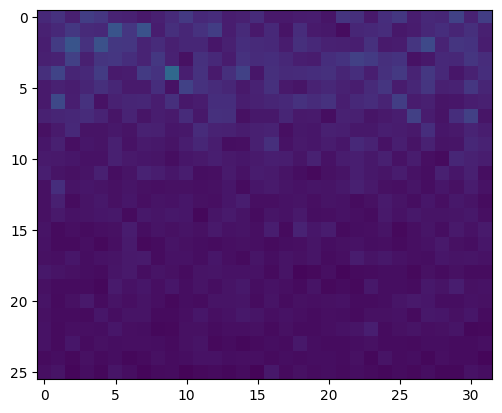

In [21]:
import matplotlib.animation as animation

maxval = np.max(energy_per_record)
minval = np.min(energy_per_record)

frames = []
fig = plt.figure()
for i in range(0, energy_per_record.shape[1], 640):
    frames.append([plt.imshow(map_data_to_grid(energy_per_record[:, i]), vmax=maxval, vmin=minval, animated=True)])

ani = animation.ArtistAnimation(fig, frames, interval=40, blit=True, repeat=False)
ani.save('energy_contact_joint3.mp4')
plt.show()

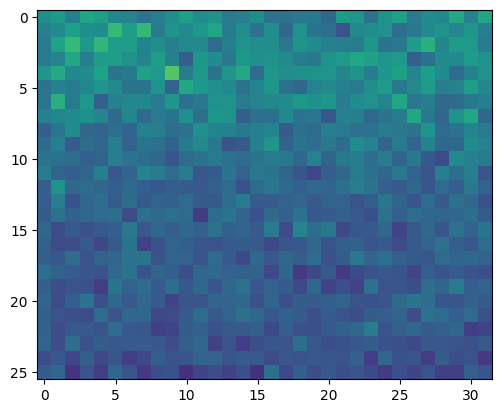

In [22]:
import matplotlib.animation as animation

maxval = np.log(np.max(energy_per_record))
minval = np.log(np.min(energy_per_record))

frames = []
fig = plt.figure()
for i in range(0, energy_per_record.shape[1], 640):
    frames.append([plt.imshow(np.log(map_data_to_grid(energy_per_record[:, i])), vmax=maxval, vmin=minval, animated=True)])

ani = animation.ArtistAnimation(fig, frames, interval=40, blit=True, repeat=False)
ani.save('energy_log_contact_joint3.mp4')